In [1]:
!pip install opencv-python matplotlib numpy scikit-learn --quiet

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
!pip install wandb --quiet

In [4]:
import wandb
wandb.login(key="0b07b231f0ded66169038bc9fe81c2e3fb2c8adb")
wandb.init(project="my-awesome-project")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/rhythmmehra/.netrc
wandb: Currently logged in as: rhythm-mehra-ug23 (rhythm-mehra-ug23-plaksha) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


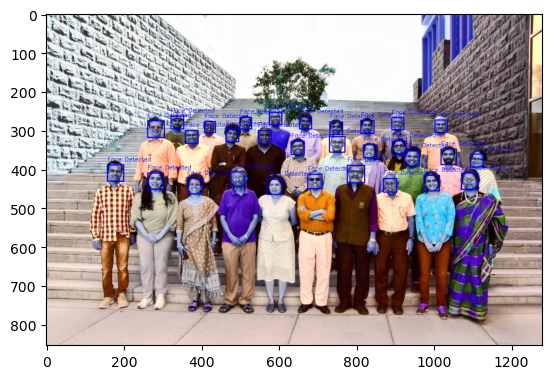

In [5]:
# Reading the image plaksha_Faculty.jpg
img = cv2.imread("plaksha_Faculty.jpg")

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required Haar-cascade XML classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Applying the face detection method on the grayscale image
# Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, scaleFactor = 1.05, minNeighbors = 4, minSize=(25, 25), maxSize=(50, 50))

# Define the text and font parameters
text = "Face Detected"  # The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
font_scale = 0.5  # Font scale factor
font_color = (0, 0, 255)  # Text color in BGR format (red)
font_thickness = 1  # Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    # Add text above the detected face
    cv2.putText(img, text, (x, y - 10), font, font_scale, font_color, font_thickness)

# Display the image with detected faces
plt.imshow(img)
plt.show()



/Users/rhythmmehra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


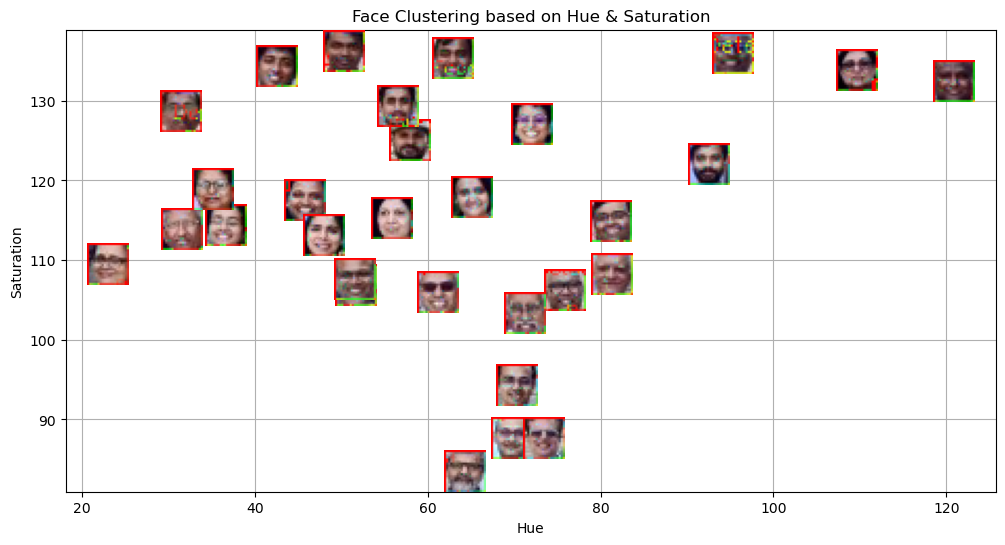

In [6]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Convert the image from BGR to HSV and store in img_hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w] 
    hue = np.mean(face[:, :, 0]) 
    saturation = np.mean(face[:, :, 1]) 
    hue_saturation.append((hue, saturation))
    face_images.append(face)  

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    # Convert face image from HSV to RGB and resize for visualization
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB), zoom=1.5)
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'bo')  # Plot data points

# Set labels and title
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering based on Hue & Saturation")
plt.grid(True)

plt.show()


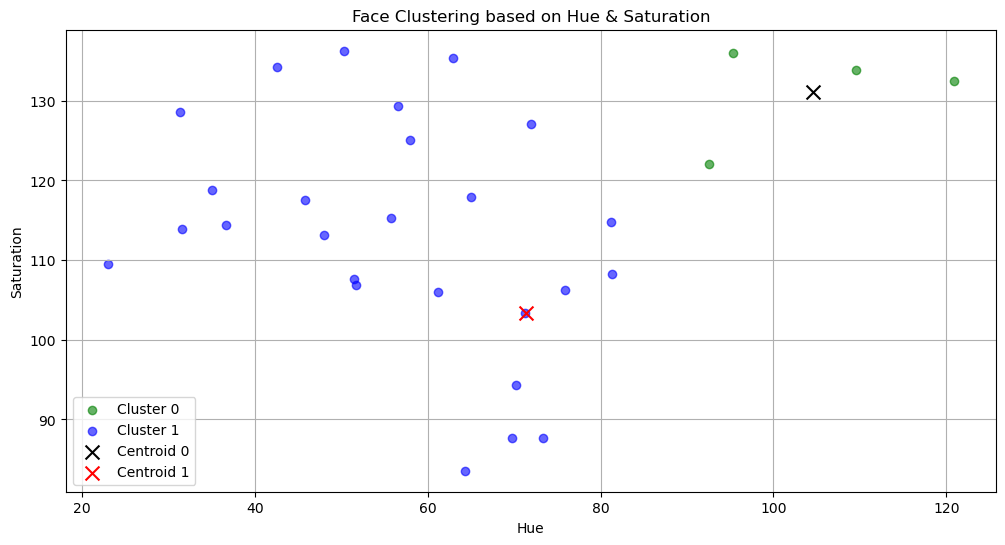

In [7]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

# Separate points into clusters based on KMeans labels
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Convert lists to NumPy arrays for easier manipulation
cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0', alpha=0.6)

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1', alpha=0.6)

# Calculate centroids from KMeans model
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroids for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='black', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', s=100, label='Centroid 1')

# Set axis labels and title
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering based on Hue & Saturation")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


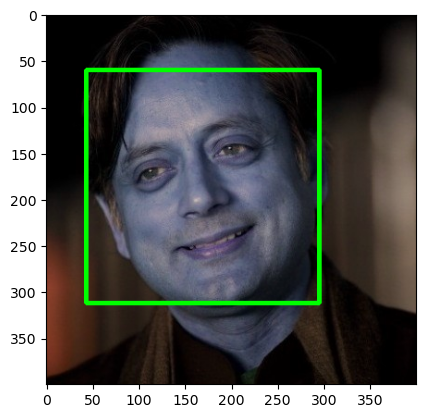

In [8]:
# Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')

# Convert to grayscale
gray_template = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(gray_template, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Show the image with detected faces
plt.imshow(template_img)
plt.show()

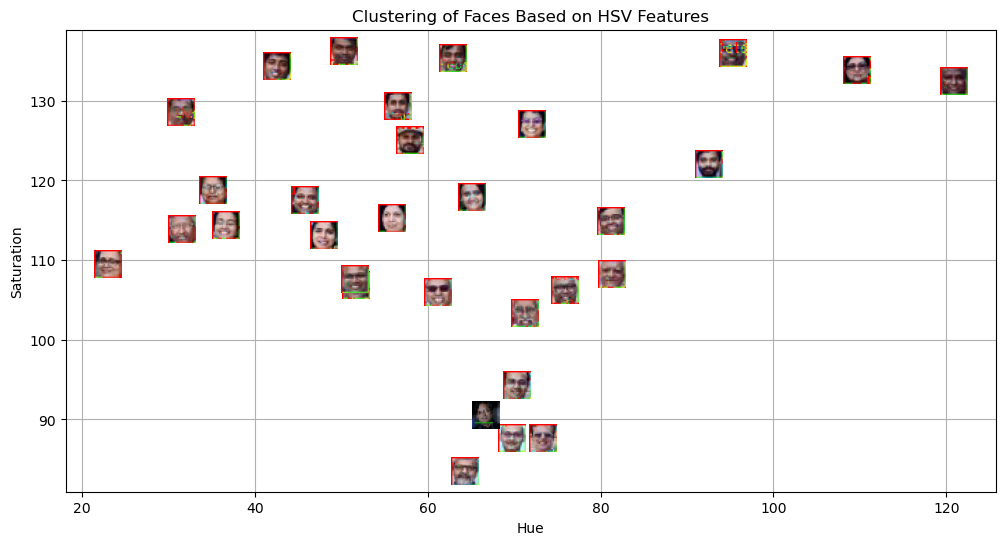

In [9]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image
template_hue = np.mean(template_hsv[:, :, 0])  # Mean Hue
template_saturation = np.mean(template_hsv[:, :, 1])  # Mean Saturation

# Predict the cluster label for the template image
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red' 
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)


ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_title("Clustering of Faces Based on HSV Features")
ax.grid(True)

plt.show()

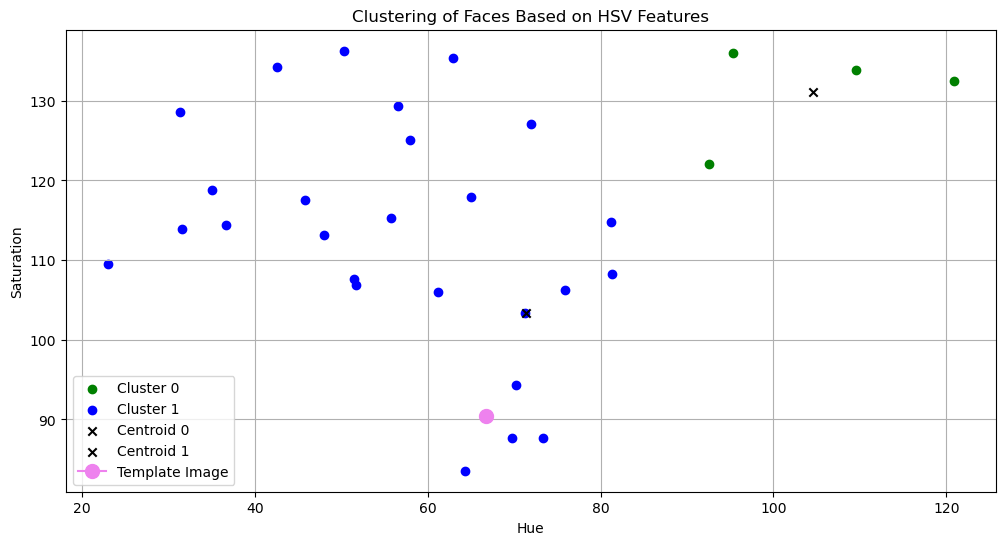

In [10]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Scatter plot setup
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Convert lists to numpy arrays for plotting
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 0 in green

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

plt.scatter(centroid_0[0], centroid_0[1], c='black', marker='x', label='Centroid 0')  # Centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='x', label='Centroid 1')  # Centroid 1

# Plot template image hue-saturation point in violet
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Template Image')

# Labels and visualization enhancements
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustering of Faces Based on HSV Features")
plt.legend()
plt.grid(True)
plt.show()

# End of Lab 5